# Dividend Growth Investing

## Motivation

Is it possible to earn $1000 every month without doing any work? How good would that be? I think earning free money is everyone's dream, but at first it looks quite difficult to achieve. However, there are actually ways to achieve making any amount of money every month without doing anything. I will introduce one of the ways to do that which is dividend investing.

## What is Dividend Investing?

In the U.S. stock market, many healthy and mature companies pay cash to its shareholders as dividend every certain period. Periods can be monthly, quarterly or every 6 months or every year. The good thing is investors who own shares of those companies don't have to do anything to collect periodic dividends. Cash payments just deposit directly to shareholders' accounts. All shareholders have to do to collect dividends is just buy and hold the shares of the company which pay out dividends. As shareholders, we can do whatever we want with the dividends. we can pay monthly expenses like phone bills or rents, go shopping to buy whatever we want or buy more shares to collect more dividends later.

Dividend is one of the equity factors which generate extra alpha returns, and investing in the stocks which pay dividends to their shareholders can collect extra returns.

## What Companies Should We Buy?

Dividend Investing doesn't involve frequent buy and sell activities. It's more like collecting good companies' shares for a very long time. The most important question is find out good companies to buy, and when we should buy them. Should we buy them when their prices are really expensive? No. We should buy them when their shares are traded at discount. How do we determine when prices are cheap? That's what we are going to find out in this notebook.

The safest place to get started is learn from history. There is a group of good companies called Dividend Kings which have increased their annual dividends more than 50 years! Companies like 3M, Coca-Cola and Johnson & Johnson are in that group. We will start analyzing some of the familiar companies in that group. We will further expand the pool of companies we can invest as we build our model from here.

## How do we identify good companies?

We will use first select companies we are familiar with strong global brands. Once we select a group of companies we want to investigate further, we will use Dividend Yield factor to determine whether the yield is attractive to invest in. 
<br>

$$\text{Dividend Yield} = \frac{\text{Annual Dividend}}{\text{Stock Price}}$$


The numerator which is annual dividend doesn't fluctuate much, but stock price which is the denominator of Dividend Yield fluctuates depending on market environment. Since our goal is to collect as much annual dividend as possible from each stock, it's always good to buy stocks when they are traded at discount. This is why investors who really make lots of money buy VALUABLE stocks when the market is going down and people are selling their shares.
<br>
<br>
The strong assumption here is that the companies we are intersted in buying must be valuable and worthy holding for a very long time.

Dividend Growth Rate

There are lots of companies which have really high dividend yield, but not all of them are good candidates for investments. Since the denominator of dividend yield is stock price, companies which experience heavy sell-offs due to whatever reasons they might have can have really high dividend yield. What really matters is to determine whether companies can gerate good profits over the long period of time to pay out consistent dividends to their shareholders. In order to generate good profits, they must have good business models.

Momentum Analysis Value Dividend Growth vs Growth Stocks

A Balanced Portfolio cosisting of High Dividend Stocks, Dividend Growth Stocks, and Growth Stocks.

Growth stocks: companies experiencing high growth potentials --> they like to reinvest their earnings to expand business models
Dividend Growth stocks: somewhat matured companies but still growing --> they have strong brand power or sustainable business models to stay financially healthy --> they like to increase dividends 
High Dividend Stocks: matured companies with less chance of huge growth potentials --> sustainable businesses with stable cash flow --> stock prices might be slowing down

Dividend Cut Alert

Factors to Consider

- Dividend Yield
- Dividend Growth
- Earnings Per Share
- Revenue Growth

In this notebook, I am going to generate a list of companies called Dividend Aristocrats. There are some requirements for companies to be selected in the group of Dividend Aristocrats, I will make the process simple by selecting companies in S&P 500 which have paid out dividends at least 25 years. I can add more requirements on top of the threshold of 25 years.

In [15]:
import json
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
from pandas_datareader.data import DataReader

## Load Annual Dividend Data from JSON

In [2]:
with open('data/historical_div_sp500.json', 'r') as fp:
    div_data = json.load(fp)

In [3]:
div_data

{'MMM': [{'1970': 0.082,
   '1971': 0.115752,
   '1972': 0.120376,
   '1973': 0.13125,
   '1974': 0.1565,
   '1975': 0.16875,
   '1976': 0.181,
   '1977': 0.2125,
   '1978': 0.25,
   '1979': 0.3,
   '1980': 0.35,
   '1981': 0.375,
   '1982': 0.4,
   '1983': 0.4125,
   '1984': 0.425,
   '1985': 0.4375,
   '1986': 0.45,
   '1987': 0.465,
   '1988': 0.53,
   '1989': 0.65,
   '1990': 0.73,
   '1991': 0.78,
   '1992': 0.8,
   '1993': 0.83,
   '1994': 0.88,
   '1995': 0.94,
   '1996': 2.16,
   '1997': 1.06,
   '1998': 1.1,
   '1999': 1.12,
   '2000': 1.16,
   '2001': 1.2,
   '2002': 1.24,
   '2003': 1.32,
   '2004': 1.44,
   '2005': 1.68,
   '2006': 1.84,
   '2007': 1.92,
   '2008': 2.0,
   '2009': 2.04,
   '2010': 2.1,
   '2011': 2.2,
   '2012': 2.36,
   '2013': 2.54,
   '2014': 3.42,
   '2015': 4.1,
   '2016': 4.44,
   '2017': 4.7,
   '2018': 5.44,
   '2019': 5.76,
   '2020': 5.88},
  {'consecutive_yrs': 51,
   '5YrsDivGrowthAvg': 13.198230876467122,
   '15YrsDivGrowthAvg': 9.4580247835039

In [4]:
df_convert = {
    'Symbol': [],
    'Div Yield': [],
    '5YrsDivGrowthAvg': [],
    '15YrsDivGrowthAvg': [],
    'Consecutive Years of Dividend Pay': []
}

In [5]:
startDate = dt.datetime.today() - dt.timedelta(days=1)
endDate = dt.datetime.today()
last_year = dt.datetime.today().year - 1

for symbol in div_data.keys():
    df_convert['Symbol'].append(symbol)
    recent_close = DataReader(symbol, 'yahoo', startDate,
                              endDate)['Adj Close'][-1]
    df_convert['Div Yield'].append(100 * div_data[symbol][0][str(last_year)] /
                                   recent_close)
    df_convert['5YrsDivGrowthAvg'].append(
        div_data[symbol][1]['5YrsDivGrowthAvg'])
    df_convert['15YrsDivGrowthAvg'].append(
        div_data[symbol][1]['15YrsDivGrowthAvg'])
    df_convert['Consecutive Years of Dividend Pay'].append(
    div_data[symbol][1]['consecutive_yrs'])

In [12]:
df = pd.DataFrame(df_convert)
df.set_index('Symbol', inplace=True)
df = df[(df['5YrsDivGrowthAvg'] > 0) & (df['15YrsDivGrowthAvg'] > 0)]
df = df.sort_values(by=['Div Yield', '5YrsDivGrowthAvg', '5YrsDivGrowthAvg'], ascending=False)
df

,Div Yield,5YrsDivGrowthAvg,15YrsDivGrowthAvg,Consecutive Years of Dividend Pay
Symbol,,,,
OKE,7.307542,17.741183,16.624137,36
T,6.862422,2.086961,2.562009,37
WMB,6.514658,4.534995,34.553314,39
MO,6.476190,9.239685,46.396783,59
XOM,6.030151,5.112112,7.815625,59
...,...,...,...,...
MAR,0.326931,6.054513,20.594374,23
DHR,0.318204,897.570728,380.154187,28
LUV,0.293686,17.972432,27.778564,41


## Dividend Aristocrats

In [13]:
div_aristrocrats = df[df['Consecutive Years of Dividend Pay'] >= 25]
div_aristrocrats

,Div Yield,5YrsDivGrowthAvg,15YrsDivGrowthAvg,Consecutive Years of Dividend Pay
Symbol,,,,
OKE,7.307542,17.741183,16.624137,36
T,6.862422,2.086961,2.562009,37
WMB,6.514658,4.534995,34.553314,39
MO,6.476190,9.239685,46.396783,59
XOM,6.030151,5.112112,7.815625,59
...,...,...,...,...
TJX,0.348274,7.869669,17.031839,34
DHR,0.318204,897.570728,380.154187,28
LUV,0.293686,17.972432,27.778564,41


## Dividend Kings

In [14]:
div_kings = df[df['Consecutive Years of Dividend Pay'] >= 50]
div_kings

,Div Yield,5YrsDivGrowthAvg,15YrsDivGrowthAvg,Consecutive Years of Dividend Pay
Symbol,,,,
MO,6.476190,9.239685,46.396783,59
XOM,6.030151,5.112112,7.815625,59
IBM,4.773427,8.546533,15.163096,59
ED,4.110693,3.167671,1.858180,59
IP,3.723462,7.678018,10.577710,59
AEP,3.341570,5.521578,3.381951,51
DTE,3.095166,6.913511,4.216519,59
KO,3.092006,5.624242,8.088648,59
MMM,3.017241,13.198231,9.458025,51


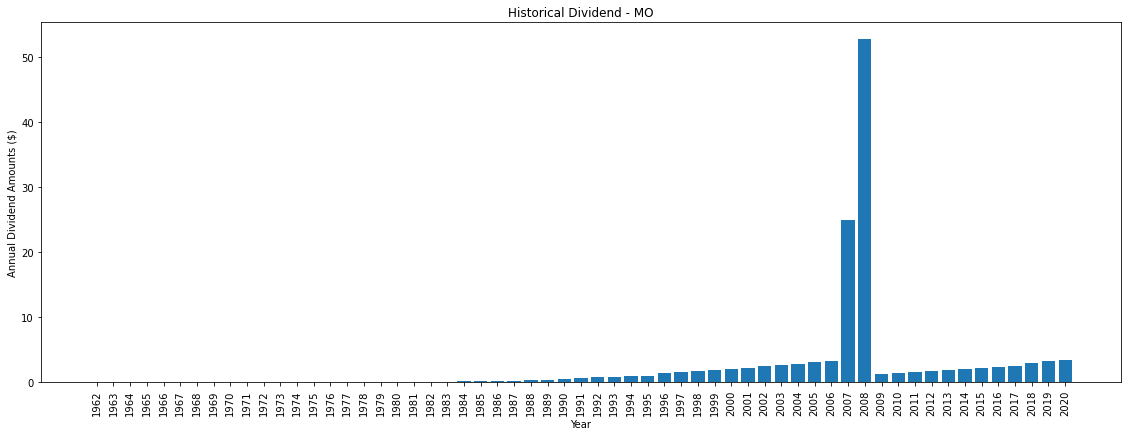

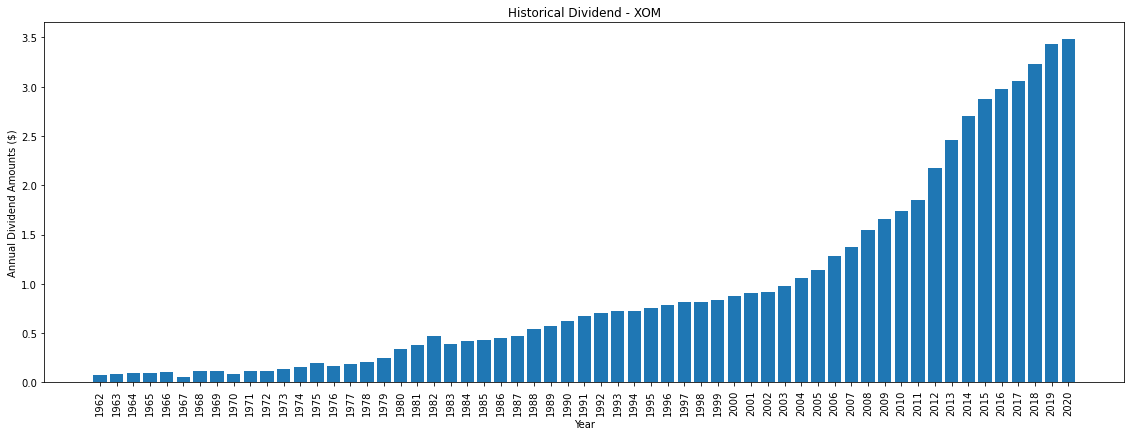

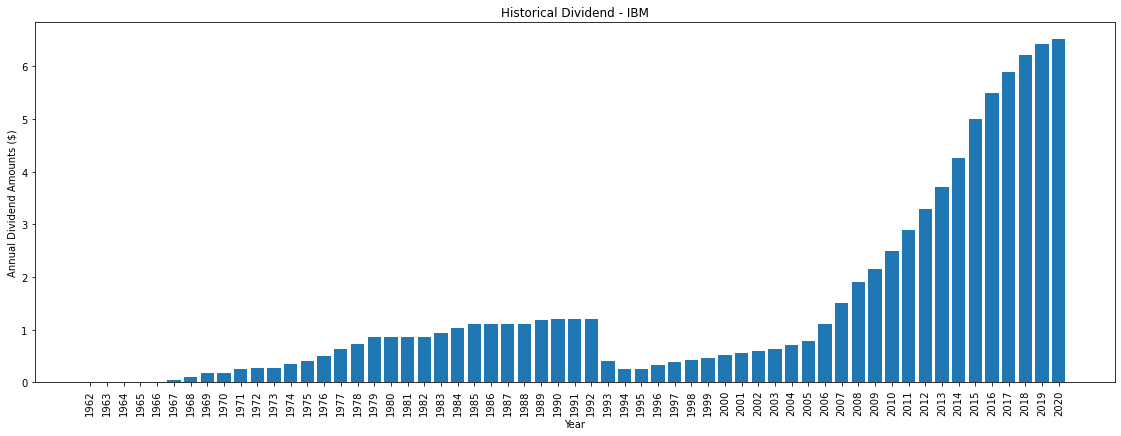

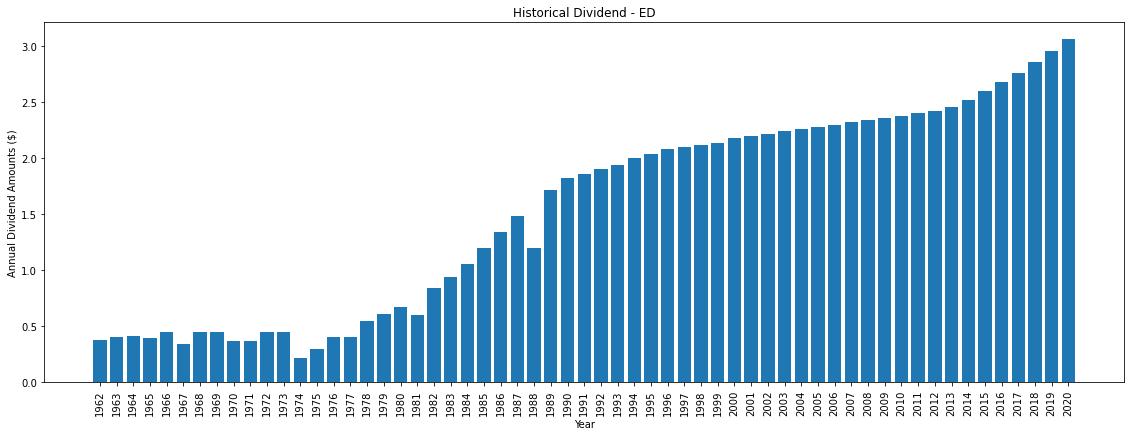

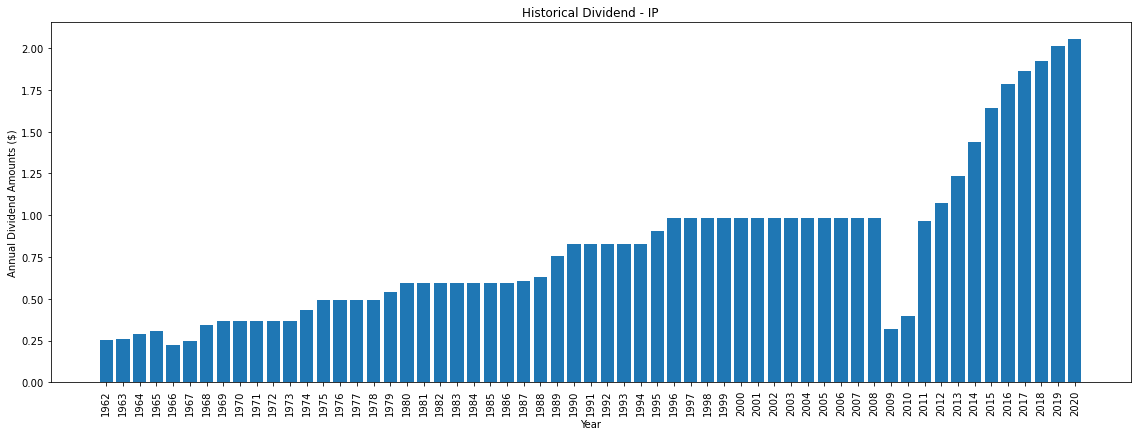

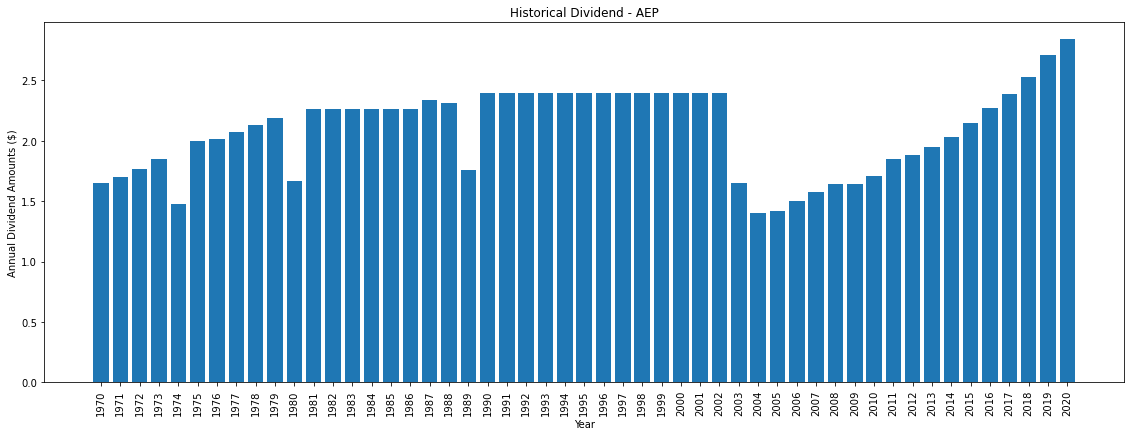

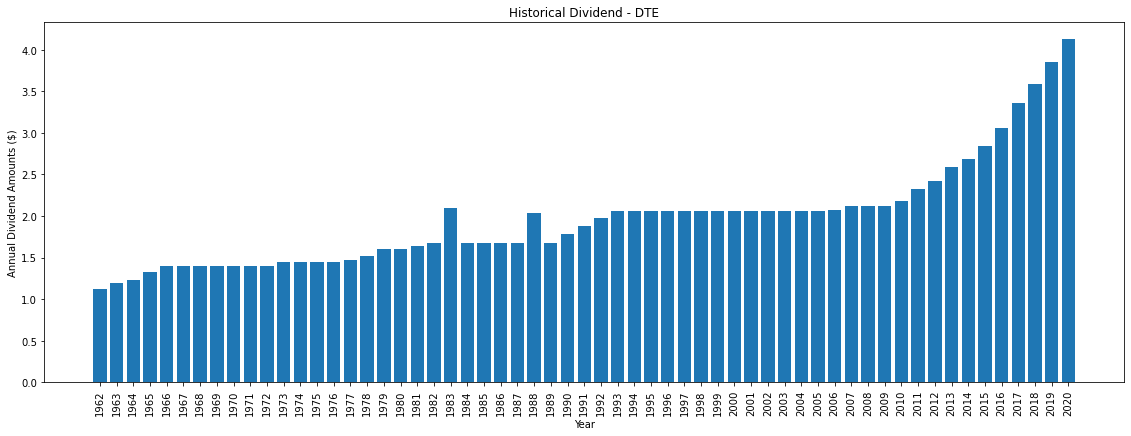

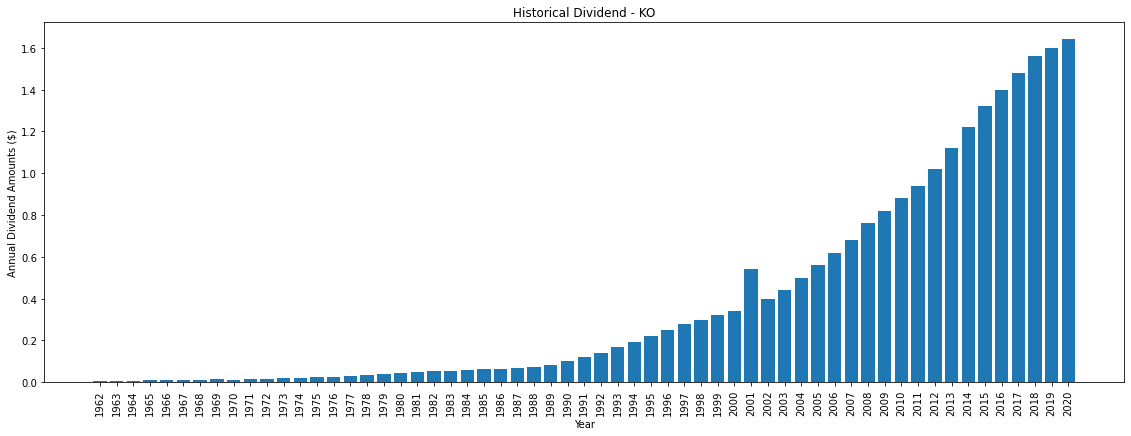

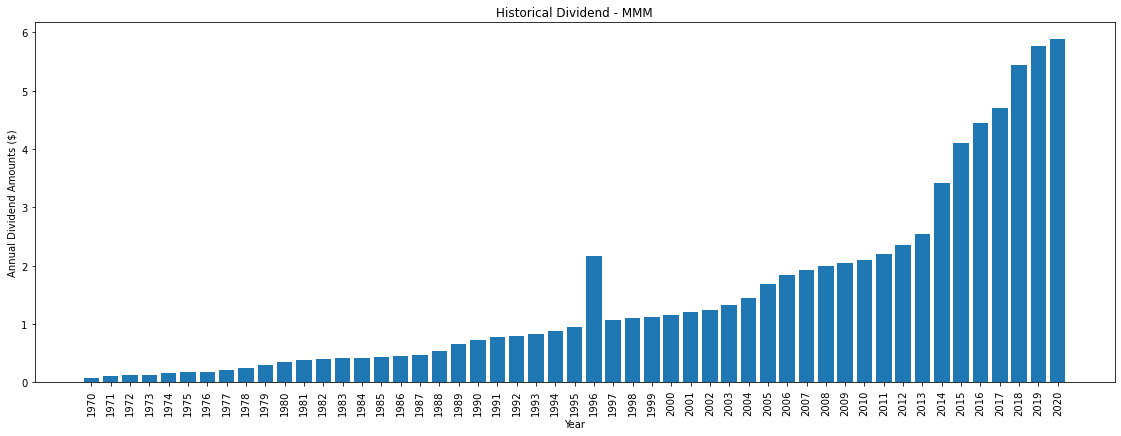

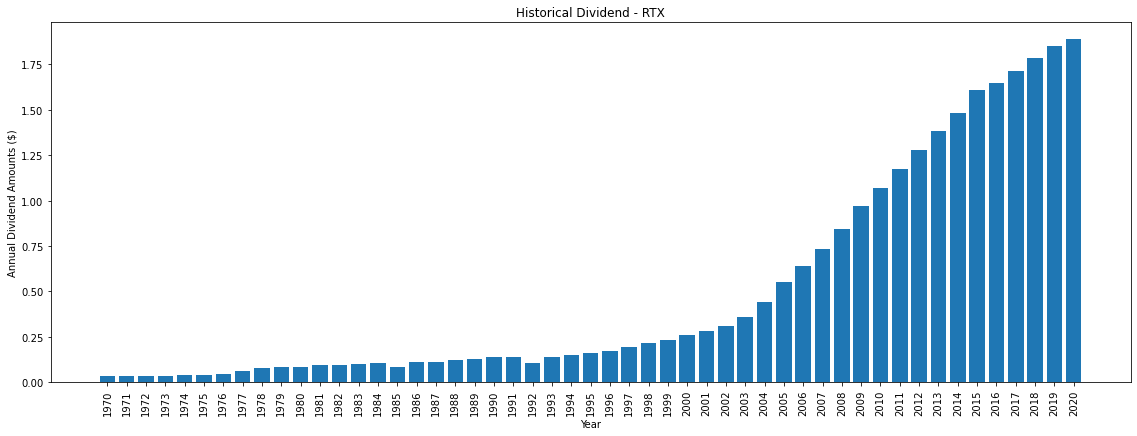

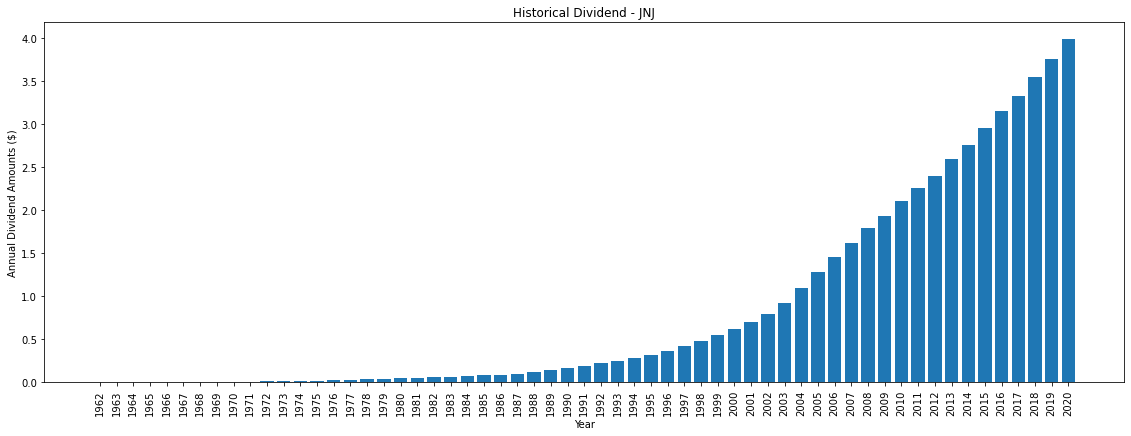

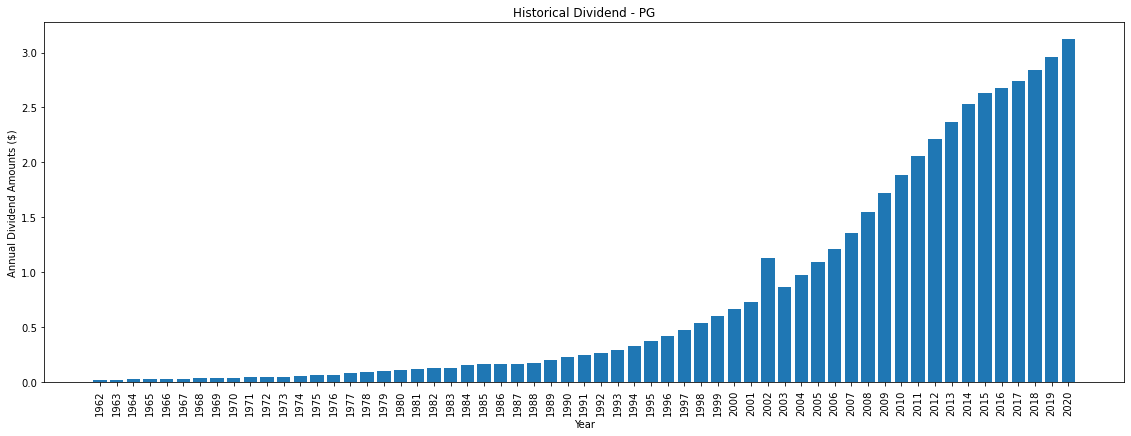

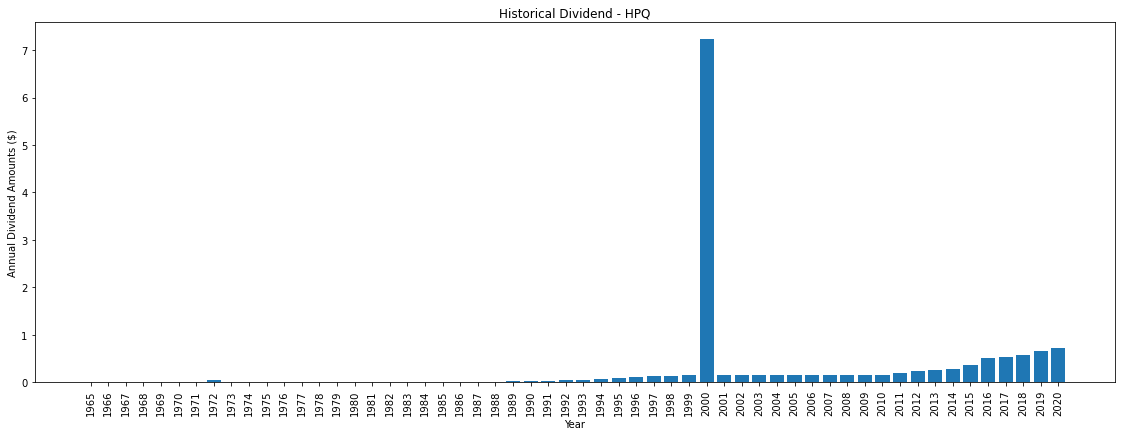

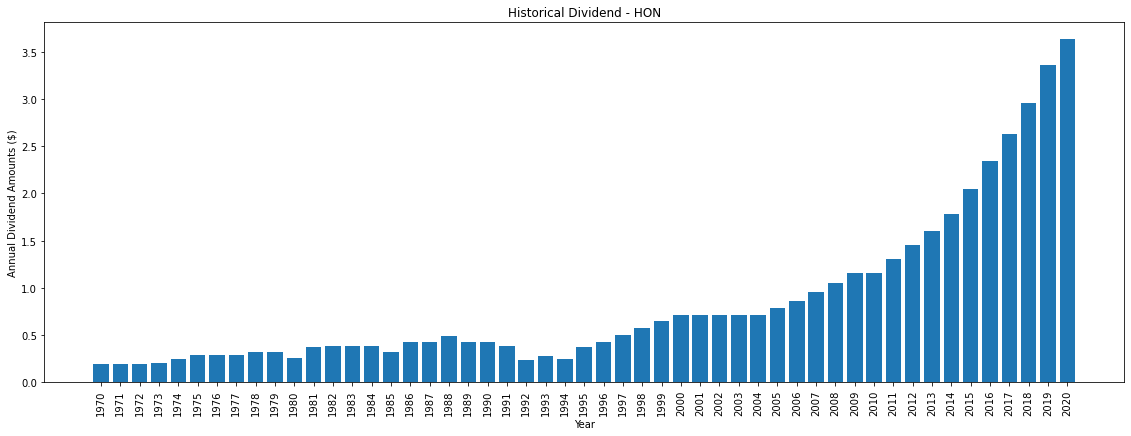

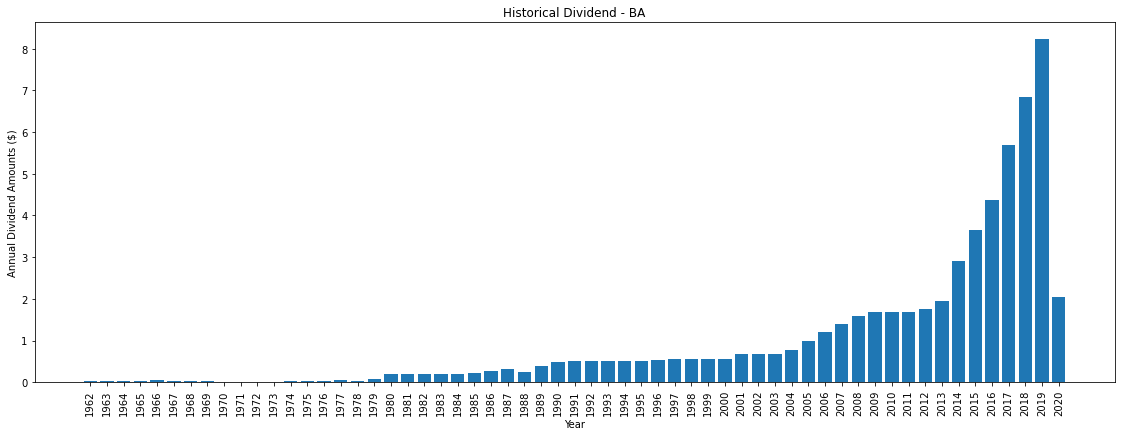

In [26]:
for symbol in div_kings.index:
    x_value = [i for i in div_data[symbol][0].keys()]
    y_value = [i for i in div_data[symbol][0].values()]

    fig = plt.figure(figsize=(15,5))
    ax = fig.add_axes([0,0,1,1])
    ax.bar(x_value,y_value)
    plt.title('Historical Dividend - ' + symbol)
    plt.xlabel('Year')
    plt.xticks(rotation=90)
    plt.ylabel('Annual Dividend Amounts ($)')
    plt.show()